In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
import warnings
warnings.filterwarnings( 'ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [67]:
train=pd.read_csv('/content/drive/My Drive/crop damage prediction/train_yaOffsB.csv')
test=pd.read_csv('/content/drive/My Drive/crop damage prediction/test_pFkWwen.csv')
submission=pd.read_csv('/content/drive/My Drive/crop damage prediction/sample_submission_O1oDc4H.csv')

In [69]:
train.shape

(88858, 10)

In [70]:
train['train_flag'] = 1
test['train_flag'] = 0
test['Crop_Damage'] = 0
print(train.shape, test.shape)

data = pd.concat((train,test))
print(data.shape)

(88858, 11) (59310, 11)
(148168, 11)


In [71]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,train_flag
0,F00000001,188,1,0,1,0,0.0,0,1,0,1
1,F00000003,209,1,0,1,0,0.0,0,2,1,1
2,F00000004,257,1,0,1,0,0.0,0,2,1,1
3,F00000005,257,1,1,1,0,0.0,0,2,1,1
4,F00000006,342,1,0,1,0,0.0,0,2,1,1


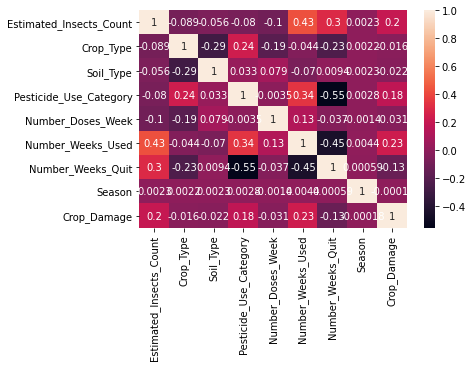

In [4]:
sns.heatmap(train.corr(),annot=True)

In [5]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [6]:
train.shape

(88858, 10)

In [7]:
train['Number_Weeks_Used']=train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mode()[0])

In [9]:
scale=StandardScaler()
estimated_insects=scale.fit_transform(train.iloc[:,1:2])
estimated_insects=pd.DataFrame(estimated_insects)
train=pd.concat([train,estimated_insects],axis=1)

In [10]:
train.drop(['ID','Estimated_Insects_Count'],axis=1,inplace=True)

In [11]:
X=train.drop(['Crop_Damage'],axis=1)
y=train['Crop_Damage']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=2)

In [13]:
clf=XGBClassifier( )
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
train_score=clf.score(X_train,y_train)
test_score= accuracy_score(y_test,y_pred)
print('Training Accuracy :',train_score)
print('Testing Accuracy :',test_score)

Training Accuracy : 0.8442872014180007
Testing Accuracy : 0.8420549178483007


In [14]:
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[1,2,4,6,10,15,20,25,35,50],
        'learning_rate':[0.001,0.01,0.05,0.1,0.5,1],
        'n_estimators':[i for i in range(0,2000,200)]}

clf=XGBClassifier()

random_cv=RandomizedSearchCV( clf,param_distributions=params,cv=3,scoring='accuracy')
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [17]:
random_cv.best_score_

0.8407140762665993

In [66]:
clf=lgb.LGBMClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
train_score=clf.score(X_train,y_train)
test_score= accuracy_score(y_test,y_pred)
print('Training Accuracy :',train_score)
print('Testing Accuracy :',test_score)


Training Accuracy : 0.8512787328025209
Testing Accuracy : 0.8454872833670943


In [51]:
model=Sequential()
model.add(Dense(units=1000,activation='relu',input_dim=8))
model.add(Dense(units=600,activation='relu'))
model.add(Dense(units=500,activation='relu'))
model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
result=model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=30)

Epoch 1/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4704 - accuracy: 0.8397 - val_loss: 0.4595 - val_accuracy: 0.8387
Epoch 2/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4504 - accuracy: 0.8406 - val_loss: 0.4495 - val_accuracy: 0.8389
Epoch 3/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4465 - accuracy: 0.8405 - val_loss: 0.4513 - val_accuracy: 0.8383
Epoch 4/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4430 - accuracy: 0.8405 - val_loss: 0.4507 - val_accuracy: 0.8388
Epoch 5/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4422 - accuracy: 0.8409 - val_loss: 0.4436 - val_accuracy: 0.8387
Epoch 6/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4408 - accuracy: 0.8412 - val_loss: 0.4449 - val_accuracy: 0.8386
Epoch 7/30
2222/2222 [==============================] - 6s 3ms/step - loss: 0.4387 - accuracy: 0.8415 - val_loss: 0.4420 - val_accuracy:

In [1]:
# I got 84% accuracy 